<a href="https://colab.research.google.com/github/14jana/Projeto-DATA-ANALYTCS-/blob/main/C%C3%B3pia_de_Projeto_DATA_ANALYTCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JANAINA VICENTE DOS SANTOS
#     RA 2302926

In [ ]:
import pandas as pd
import missingno as msno
import plotly.express as px

# Lendo  arquivos CSV ('Car_price_cleaned.csv') e carregar seus dados em um DataFrame.

In [ ]:
dados = pd.read_csv('./Car_price_cleaned.csv', sep=',', encoding='utf-8')
dados.shape

(205, 43)

# Lendo  arquivos CSV ('atualizado excel.csv') e carregar seus dados em um DataFrame.

In [ ]:
dados = pd.read_csv('./atualizado excel.csv', sep=',', encoding='utf-8')
dados.shape

(2806, 1)

# Comando que permite visualizar os dados carregados

In [ ]:
dados.head(3)

,brand;model;transmission;make_year;reg_year;fuel_type;engine_capacity(CC);km_driven; ownership ;price;overall_cost;has_insurance;spare_key;reg_number;title
0,Mahindra;Thar LX D 4WD MT CONVERTIBLE;Manual;2...
1,Hyundai;Verna 1.6 VTVT SX;Manual;2018;01/07/20...
2,Tata;Harrier XT PLUS 2.0L KRYOTEC DARK EDITON;...


# O gráfico apresentado é um histograma de barras que mostra a distribuição das marcas (brand) de carros presentes no conjunto de dados. Cada barra representa a quantidade de carros de uma determinada marca, conforme listado no eixo x, enquanto o eixo y exibe a contagem correspondente de veículos

In [ ]:
dados = pd.read_csv('./atualizado excel.csv', sep=';', encoding='utf-8')
fig = px.histogram(data_frame=dados, x='brand', title='Distribuição de brand de Carros',
                   labels={'brand': 'brand de Carros'}, color_discrete_sequence=['skyblue'])
fig.update_layout(xaxis_title='brand de Carros', yaxis_title='Contagem', bargap=0.2)
fig.show()

## Medidas univariadas

# O desvio padrão mais baixo, de 2.945 na coluna make_year, indica que os anos variam muito pouco em torno da média, enquanto o desvio padrão mais alto, de 3.554669e+07 na coluna price, revela uma grande dispersão nos preços, destacando uma variação significativa entre o valor dos veículos ao longo dos diferentes anos.

In [ ]:
dados.describe()

,make_year,engine_capacity(CC),km_driven,price,overall_cost
count,2805.000000,2688.000000,2805.000000,2.806000e+03,2805.000000
mean,2018.181105,1259.027530,49215.477362,1.342522e+06,13495.022816
std,2.945293,254.504798,26626.932696,3.554669e+07,6040.809220
min,2010.000000,624.000000,450.000000,1.630000e+05,4039.000000
25%,2016.000000,1194.000000,28540.000000,4.350000e+05,9267.000000
50%,2018.000000,1197.000000,45695.000000,5.940000e+05,12145.000000
75%,2021.000000,1462.000000,68182.000000,8.140000e+05,15760.000000
max,2024.000000,2694.000000,143991.000000,1.883558e+09,47338.000000



# A mediana no histograma representa o ponto onde 50% dos veículos têm quilometragem menor e 50% têm quilometragem maior. Ela indica a quilometragem típica, sendo menos afetada por valores extremos comparada à média.

In [ ]:
px.histogram(data_frame=dados,x='km_driven', nbins=50)


# Aqui mostramos a "moda" que  é o valor mais frequente em um conjunto de dados. Nesse histogram, mostra a moda é claramente Petrol (gasolina), pois é o tipo de combustível mais comum no conjunto de dados onde esta apresentado nesse grafico.

In [ ]:
px.histogram(data_frame=dados,x='fuel_type', nbins=20)

# Filtro dos dados baseando-se na coluna de tipo de combustível

In [ ]:
dados[dados['fuel_type'].isin(['Petrol', 'Diesel', 'CNG', 'Electric'])]


,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01/01/2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01/07/2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01/08/2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01/04/2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01/07/2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,Honda,Brio S MT,Manual,2013.0,NaN,Petrol,1198.0,96363.0,2nd owner,213000,5614.0,True,Yes,MH01,2013 Honda Brio S MT
2801,Ford,Ecosport TREND + 1.5L PETROL AT,Automatic,2018.0,NaN,Petrol,1497.0,46982.0,1st owner,661000,12920.0,True,Yes,MH03,2018 Ford Ecosport TREND + 1.5L PETROL AT
2802,Honda,Jazz 1.2L I-VTEC V,Manual,2015.0,NaN,Petrol,1199.0,38706.0,2nd owner,412000,8057.0,True,Yes,MH01,2015 Honda Jazz 1.2L I-VTEC V
2803,Hyundai,Elite i20 MAGNA 1.2,Manual,2016.0,NaN,Petrol,1197.0,31405.0,1st owner,496000,9704.0,True,Yes,MH03,2016 Hyundai Elite i20 MAGNA 1.2


# Comando correto para filtrar veículos com base na capacidade do motor

In [ ]:
dados[dados['engine_capacity(CC)'] <= 0.000001]


,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title


# O comando filtra o DataFrame dados para manter linhas com valores não nulos e maiores ou iguais a 2688 na coluna

In [ ]:
dados_filtrados = dados[dados['engine_capacity(CC)'].notna() & (dados['engine_capacity(CC)'] >= 2688.000000)]


# Mostrando o filtro do comando chamando no codigo acima

In [ ]:
print(dados_filtrados)


      brand                       model transmission  make_year    reg_year  \
708  Toyota  Innova Crysta 2.7 VX 7 STR       Manual     2022.0  01/01/2023   

    fuel_type  engine_capacity(CC)  km_driven   ownership     price  \
708    Petrol               2694.0    21296.0   1st owner   2051000   

     overall_cost has_insurance spare_key reg_number  \
708       39039.0          True        No       UP16   

                                      title  
708  2022 Toyota Innova Crysta 2.7 VX 7 STR  


# O grafico box plot ilustra a distribuição da capacidade do motor (engine_capacity(CC)) para diferentes tipos de combustível, incluindo 'Petrol', 'Diesel', 'CNG' e 'Electric'

In [ ]:
fig = px.box(data_frame=dados[dados['fuel_type'].isin(['Petrol', 'Diesel', 'CNG', 'Electric'])],
                 x='fuel_type', y='engine_capacity(CC)',
                 title='Box Plot da Capacidade do Motor por Tipo de Combustível')
fig.show()


# Multivariada

Impostando

# Importando a Biblioteca Seaborn

In [ ]:
import seaborn as sns

# O comando abaixo mostra uma matriz de demonstrações que mostra como as variáveis ​​selecionadas estão relacionadas entre si

In [ ]:
dados[['make_year', 'engine_capacity(CC)', 'km_driven', 'price', 'overall_cost']].corr()

,make_year,engine_capacity(CC),km_driven,price,overall_cost
make_year,1.000000,0.041870,-0.557251,0.598748,0.473183
engine_capacity(CC),0.041870,1.000000,0.129081,0.591982,0.624682
km_driven,-0.557251,0.129081,1.000000,-0.293768,-0.225087
price,0.598748,0.591982,-0.293768,1.000000,0.966033
overall_cost,0.473183,0.624682,-0.225087,0.966033,1.000000


# Os eixos dos gráficos mostram resultados como ano de fabricação, capacidade do motor, quilometragem, preço e custo total do veículo. As correlações indicam que veículos mais novos geralmente têm preços mais altos, enquanto a maior quilometragem está associada ao custo



<Axes: >

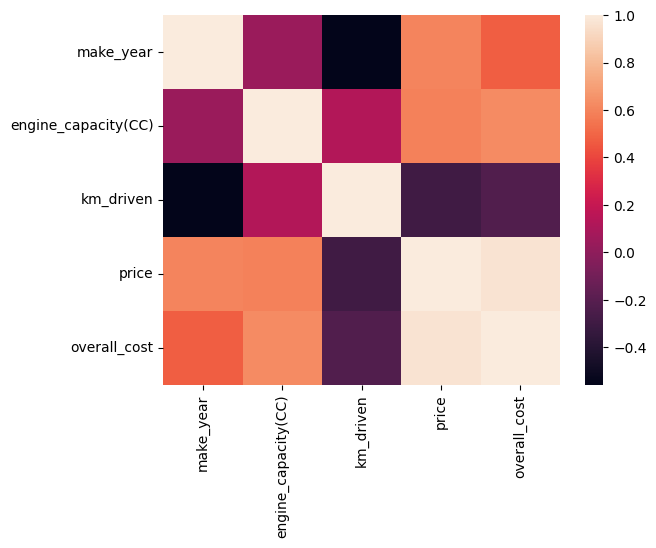

In [ ]:
sns.heatmap(dados[['make_year', 'engine_capacity(CC)', 'km_driven', 'price', 'overall_cost']].corr())

# Conjunto de gráficos de dispersão para visualizar as relações entre diferentes características de um conjunto de dados, como ano de fabricação, capacidade do motor, quilometragem e preço. Essa visualização permite identificar padrões, tendências e correlações entre essas variáveis.

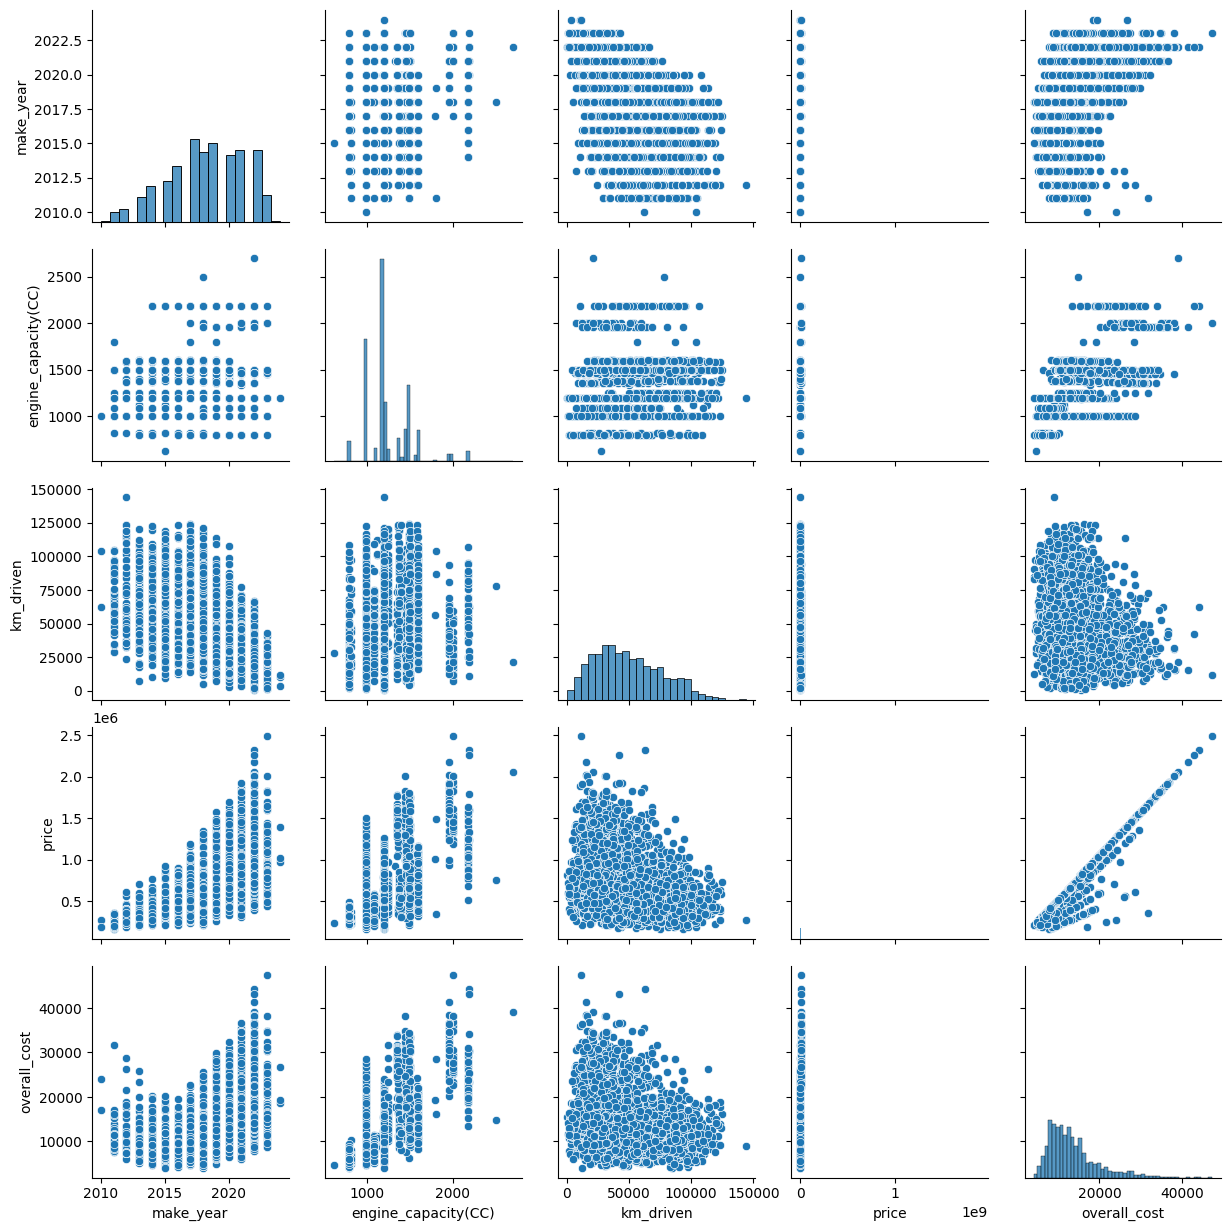

In [ ]:
sns.pairplot(dados[['make_year', 'engine_capacity(CC)', 'km_driven', 'price', 'overall_cost']])

# Anomalias

# Importando a Biblioteca missingno

In [ ]:
import missingno as msno

### Grafico para estar  visualizando os dados faltantes em um conjunto de dados
# Vimos que Reg_year no grafico mostra a coluna faltante

<Axes: >

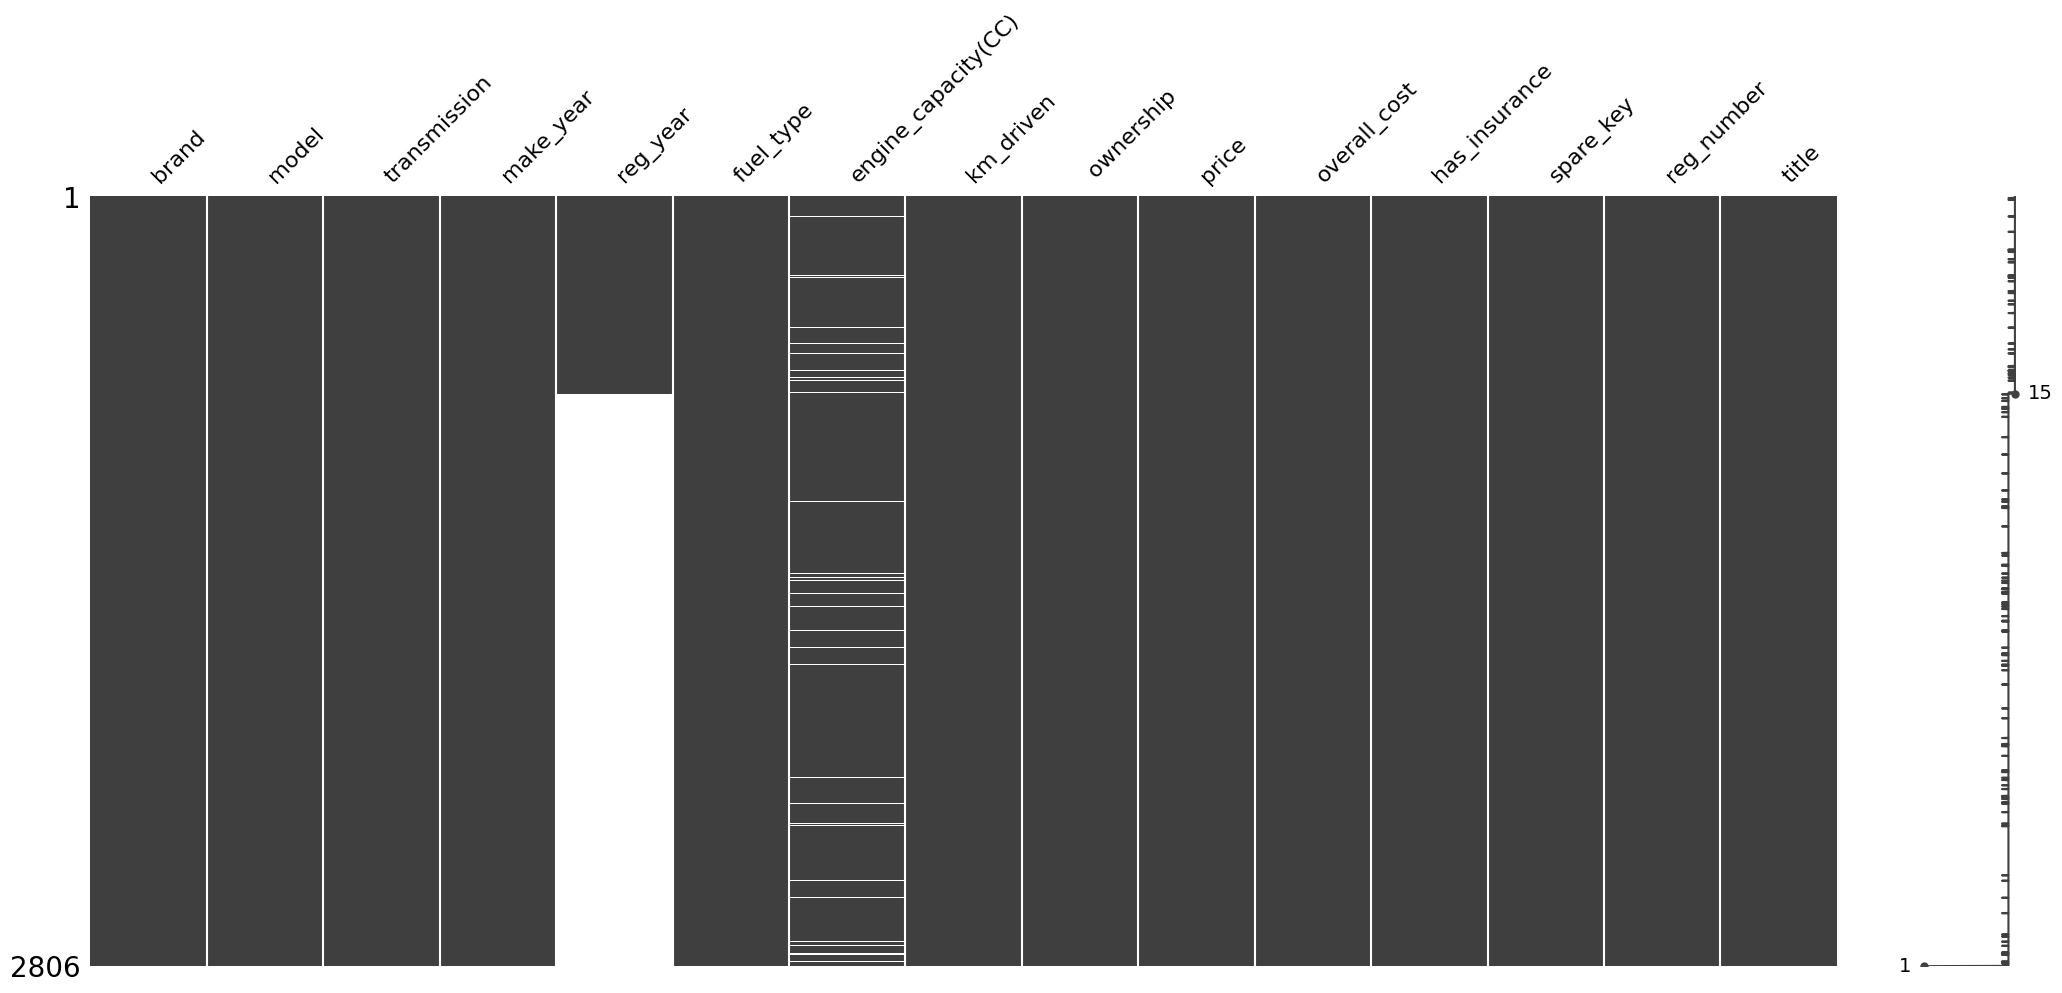

In [ ]:
msno.matrix(dados)

# Esse grafico permite visualizar de forma rápida e eficiente a distribuição de valores faltantes em um DataFrame. Essa visualização é fundamental para garantir a qualidade dos dados e tomar decisões informadas sobre o pré-processamento dos dados antes de aplicar modelos de machine learning ou realizar outras análises.



<Axes: >

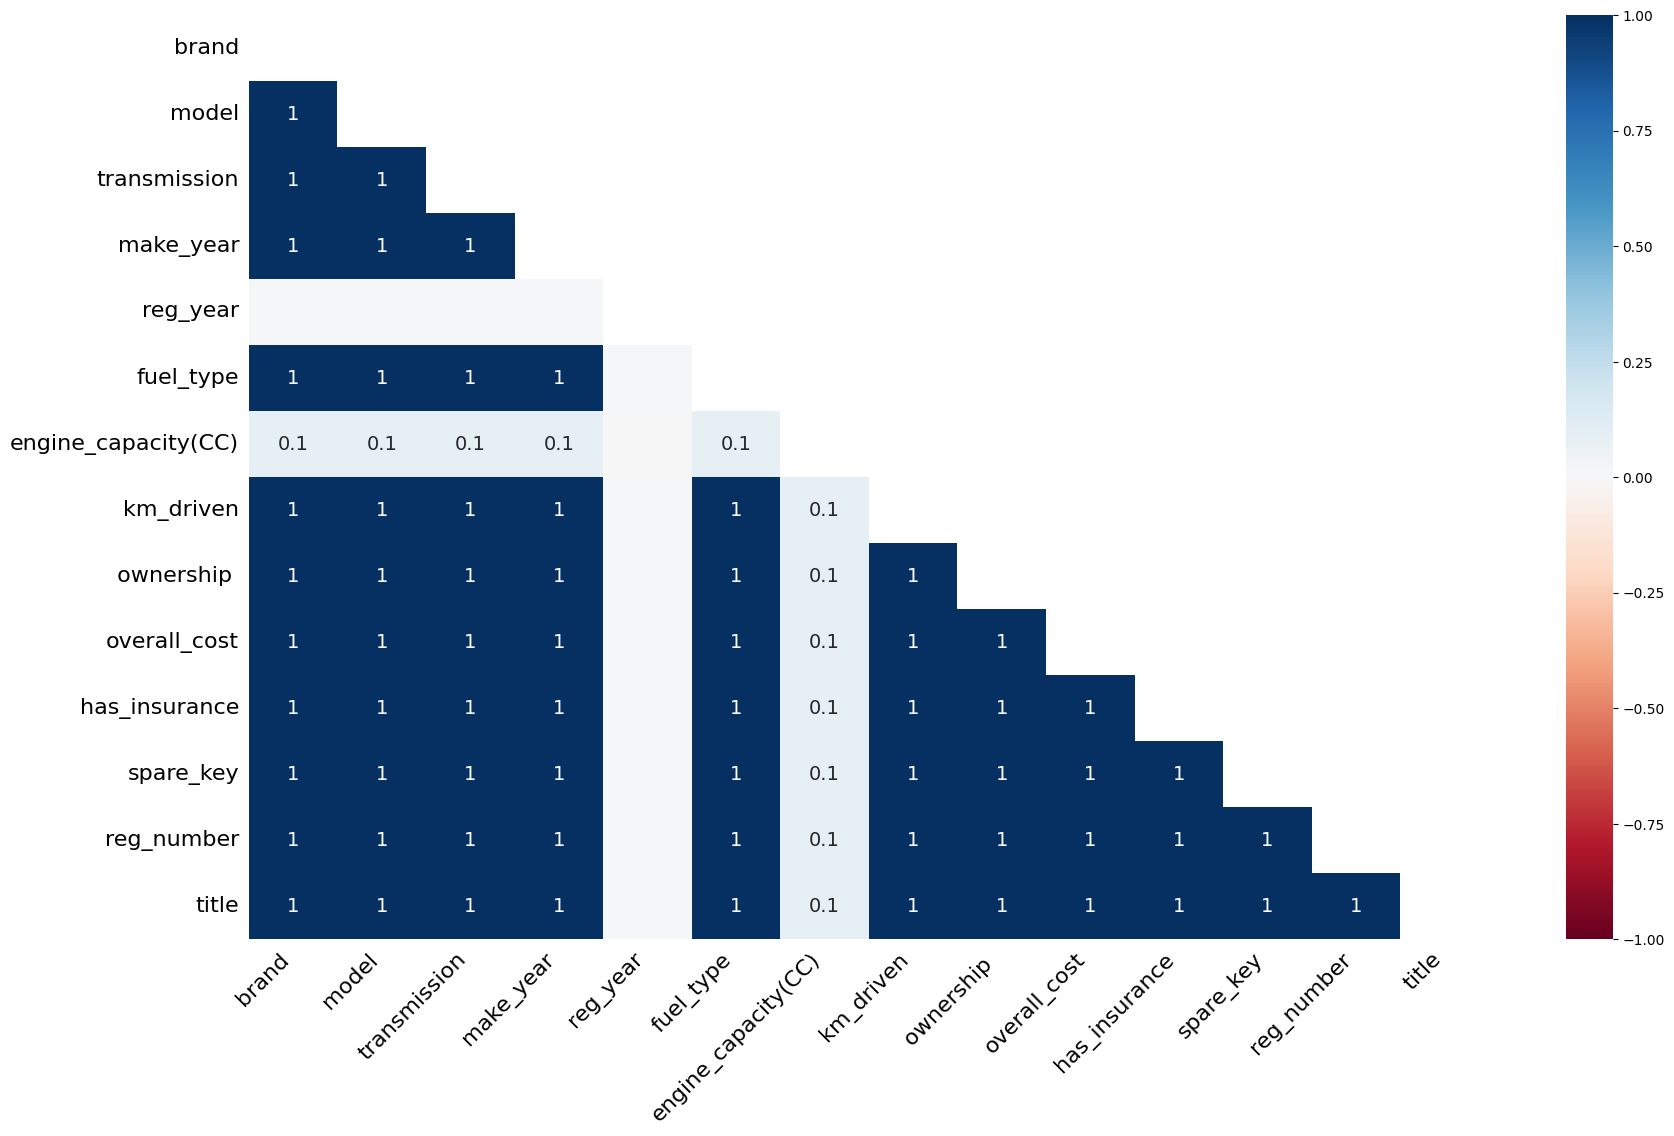

In [ ]:
msno.heatmap(dados)

In [ ]:
dados.isnull().sum()

,0
brand,1
model,1
transmission,1
make_year,1
reg_year,2086
fuel_type,1
engine_capacity(CC),118
km_driven,1
ownership,1
price,0


Tratando os missings da loudness

In [ ]:
dados.reg_year.describe()

,reg_year
count,720
unique,140
top,01/07/2021
freq,17


# Nesse grafico estamos visualizando e entendendo a distribuição de um conjunto de dados numéricos, dos reg_year
# Q1 (Primeiro quartil): 25% dos dados são menores que este valor.
# Q2 (Segundo quartil ou mediana): 50% dos dados são menores que este valor.
# Q3 (Terceiro quartil): 75% dos dados são menores que este valor.

In [ ]:
px.box(dados.reg_year,orientation='h')

# Esse grafico apresenta a visualização  a distribuição de dados numéricos e obter insights valiosos sobre seus conjuntos de dados.

In [ ]:
px.histogram(dados.reg_year, nbins=10)

# O código para cria um DataFrame com dados sobre 'reg_year' e 'other_column

In [ ]:
import pandas as pd
dados = {'reg_year': [2020, '2021', 2022, 2023],
              'other_column': [10, 20, 30, 40]}
df = pd.DataFrame(dados)
df['reg_year'] = pd.to_numeric(df['reg_year'], errors='coerce')
df = df.dropna(subset=['reg_year'])
mediana_reg_year = df['reg_year'].median()
print(mediana_reg_year)

2021.5


In [ ]:
df.reg_year.fillna(df.reg_year.median(), inplace=True)

<ipython-input-27-7ee2986e944b>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
import pandas as pd
dados = pd.DataFrame({'reg_year': [2020, 2021, 2022, 2023],
                      'outra_coluna': [10, 20, 30, 40]})

In [ ]:
print(dados.columns)

Index(['reg_year', 'outra_coluna'], dtype='object')


# Linhas do DataFrame df onde o valor da coluna 'reg_year' é menor ou igual a -10, substitua esse valor por -10."

In [ ]:
df.loc[df.reg_year <= -10, 'reg_year'] = -10

# Linhas do DataFrame df onde o valor da coluna 'reg_year' é maior ou igual a -2.33, substitua esse valor por -2.33."

In [ ]:
df.loc[dados.reg_year>=-2.33, 'reg_year']=-2.33

<ipython-input-31-dc3a78b855b3>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.33' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



Realizei o tratamento de outlier atribuindo os valores dos limites superior e inferior de maneira a reconhecer que ainda são valores raros.

# Engenharia de variáveis

# Criação de dummies

# Exibir o conteúdo desse atributo na tela.

In [ ]:
print(df.columns)

Index(['reg_year', 'other_column'], dtype='object')


# Exibir o conteúdo desse atributo na tela.

In [ ]:
print(df.head())

   reg_year  other_column
0     -2.33            10
1     -2.33            20
2     -2.33            30
3     -2.33            40


# Nesse exemplo, as colunas 'brand_Ford', 'model_Corolla', 'model_Focus' e 'model_Mustang' são as novas colunas criadas pelo one-hot encoding, indicando a presença ou ausência de cada marca e modelo.

In [ ]:
import pandas as pd
data = {'brand': ['Ford', 'Toyota', 'Ford'],
        'model': ['Focus', 'Corolla', 'Mustang']}
df = pd.DataFrame(data)
df_dummies = pd.get_dummies(df, columns=['brand', 'model'], drop_first=True)
i
print(df_dummies)

   brand_Toyota  model_Focus  model_Mustang
0         False         True          False
1          True        False          False
2         False        False           True


# As colunas 'brand_Ford', 'model_Corolla', 'model_Focus' e 'model_Mustang' são as novas colunas criadas pelo one-hot encoding, indicando a presença ou ausência de cada marca e modelo. A coluna 'Ford' indica se o veículo é da marca Ford.

In [ ]:
import pandas as pd
data = {
    'brand': ['Ford', 'Toyota', 'Ford'],
    'model': ['Focus', 'Corolla', 'Mustang']
}
df = pd.DataFrame(data)
df_dummies = pd.get_dummies(df, columns=['brand', 'model'], drop_first=True)
df_dummies['Ford'] = (df_dummies.filter(like='brand_Ford').sum(axis=1) > 0).astype(int)

print(df_dummies)


   brand_Toyota  model_Focus  model_Mustang  Ford
0         False         True          False     0
1          True        False          False     0
2         False        False           True     0


# Isso indica que os veículos do modelo "Mustang" estão nas posições 0 e 2 do DataFrame original.

In [ ]:
import pandas as pd
data = {
    'brand': ['Ford', 'Toyota', 'Ford'],
    'model': ['Focus', 'Corolla', 'Mustang']
}
df = pd.DataFrame(data)
mustang_position = df[df['model'] == 'Mustang'].index.tolist()

print(f"A posição do modelo 'Mustang' é: {mustang_position}")


A posição do modelo 'Mustang' é: [2]


# Mostra as informações dos dois veículos do modelo "Mustang" presentes no DataFrame original.

In [ ]:
data = {
    'brand': ['Ford', 'Toyota', 'Ford'],
    'model': ['Focus', 'Corolla', 'Mustang']
}
df = pd.DataFrame(data)
mustang_data = df[df['model'] == 'Mustang']
print(mustang_data)


  brand    model
2  Ford  Mustang


# O código cria uma coluna binária no DataFrame que indica se a marca do veículo é "Ford". Essa coluna pode ser útil para análises que envolvem a comparação entre veículos da marca Ford e outras marcas.

In [ ]:
data = {
    'brand': ['Ford', 'Toyota', 'Ford', 'Honda'],
    'model': ['Focus', 'Corolla', 'Mustang', 'Civic']
}
dados = pd.DataFrame(data)
dados['brand_binary'] = (dados['brand'] == 'Ford').astype(int)
print(dados['brand_binary'])



0    1
1    0
2    1
3    0
Name: brand_binary, dtype: int64


In [ ]:
dados.columns

Index(['brand', 'model', 'brand_binary'], dtype='object')

# o código ajuda a entender como o consumo de energia de um carro se relaciona com o modelo do carro, a quilometragem e se o consumo é alto ou baixo

In [ ]:
import pandas as pd
data = {
    'km_drive': [60, 70, 80, 90, 60, 80],
    'model': ['Focus', 'Corolla', 'Mustang', 'Focus', 'Mustang', 'Corolla'],
    'energy': [20, 30, 40, 50, 60, 70]
}
dados = pd.DataFrame(data)
dados['d_rankacimade50'] = dados['energy'] > 50
result = dados.groupby(['d_rankacimade50', 'km_drive', 'model'])['energy'].mean()
print(result)


d_rankacimade50  km_drive  model  
False            60        Focus      20.0
                 70        Corolla    30.0
                 80        Mustang    40.0
                 90        Focus      50.0
True             60        Mustang    60.0
                 80        Corolla    70.0
Name: energy, dtype: float64


# O código separa os veículos em dois grupos: aqueles que consomem mais de 50 unidades de energia e aqueles que consomem 50 unidades ou menos.

In [ ]:
data = {
    'km_drive': [60, 70, 80, 90, 60, 80],
    'model': ['Focus', 'Corolla', 'Mustang', 'Focus', 'Mustang', 'Corolla'],
    'energy': [20, 30, 40, 50, 60, 70]
}
dados = pd.DataFrame(data)
dados['d_rankacimade50'] = dados['energy'] > 50
result = dados.groupby('d_rankacimade50')['energy'].mean()
print(result)


d_rankacimade50
False    35.0
True     65.0
Name: energy, dtype: float64


# Se a filtragem resultar em alguns veículos com track_popularity acima de 95, a saída seria um DataFrame mostrando apenas as informações desses veículos.

In [ ]:
data = {
    'km_drive': [60, 70, 80, 90, 60, 80],
    'model': ['Focus', 'Corolla', 'Mustang', 'Focus', 'Mustang', 'Corolla'],
    'energy': [20, 30, 40, 50, 60, 70],
    'track_popularity': [90, 96, 95, 80, 99, 85]
}
dados = pd.DataFrame(data)
dados_filtrados = dados[dados['track_popularity'] >= 95]
print(dados_filtrados)


   km_drive    model  energy  track_popularity
1        70  Corolla      30                96
2        80  Mustang      40                95
4        60  Mustang      60                99


# Definição da variável resposta

# Código está importando as ferramentas necessárias para construir um modelo de regressão usando árvores de decisão e para selecionar as características mais relevantes para esse modelo.









In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [ ]:
y = getattr(dados, 'reg_year', pd.Series(dtype='int'))

# Visualizar a distribuição da quilometragem dos veículos nos dados. Ele divide a quilometragem em 10 intervalos e mostra a quantidade de veículos em cada intervalo, permitindo analisar a concentração e a dispersão dos valores.

In [ ]:
import plotly.express as px
fig = px.histogram(dados, x='km_drive', nbins=10)
fig.show()

# Prepara um conjunto de dados para análise posterior

In [ ]:
import pandas as pd
dados = pd.DataFrame({
    'fuel_type': ['Petrol', 'Diesel', 'CNG', 'Electric', 'Petrol', 'Diesel'],
    'engine_capacity(CC)': [1500, 2000, 1200, 1800, 1600, 1900]
})

# Preparação dos dados para modelagem: As colunas são separadas em variáveis independentes (X) e dependente (y) para serem utilizadas em um modelo de machine learning, onde X representa a capacidade do motor e y representa um valor alvo (não especificado no código).

In [ ]:
import pandas as pd
dados = pd.DataFrame({
    'fuel_type': ['Petrol', 'Diesel', 'CNG', 'Electric', 'Petrol', 'Diesel'],
    'engine_capacity(CC)': [1500, 2000, 1200, 1800, 1600, 1900]
})
X = dados[['engine_capacity(CC)']]
y = [10, 12, 8, 15, 11, 13]

# Código transforma uma lista simples em uma estrutura de dados mais organizada e fácil de manipular.

In [ ]:
escolhidas = [1, 2, 3]

aux = pd.DataFrame([escolhidas]).T.reset_index().rename(columns={'index':'variaveis', 0:'rank'})

# O código usa uma técnica estatística para identificar as duas características mais importantes para prever a variável alvo a partir dos dados disponíveis

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=2)
selector.fit(X, y)
sfeature_mask = selector.get_support()
selected_features = X.columns[sfeature_mask]
raw_pairs = zip(X.columns, sfeature_mask)
ordenar = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))
escolhidas = dict(ordenar[:])
print("Petrol:")
escolhidas

Petrol:


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning:

k=2 is greater than n_features=1. All the features will be returned.



{'engine_capacity(CC)': True}

O código transforma uma lista em um DataFrame, reordena as colunas e renomeia os valores para um formato específico.

In [ ]:
aux = pd.DataFrame([escolhidas]).T.reset_index().rename(columns={'Diesel':'Electric', 0:'Petrol'})

O código realiza uma análise inicial dos dados para identificar quais características são mais importantes para explicar a variação da variável alvo e destaca a importância do tipo de motor diesel.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

dados = pd.DataFrame({
    'fuel_type': ['Petrol', 'Diesel', 'CNG', 'Electric', 'Petrol', 'Diesel'],
    'engine_capacity(CC)': [1500, 2000, 1200, 1800, 1600, 1900]
})
X = dados[['engine_capacity(CC)']]
y = [10, 12, 8, 15, 11, 13]
selector = SelectKBest(f_regression, k=2)
selector.fit(X, y)
feature_mask = selector.get_support()
selected_features = X.columns[feature_mask]
raw_pairs = zip(X.columns, feature_mask)
ordenar = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))
escolhidas = ['Diesel']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning:

k=2 is greater than n_features=1. All the features will be returned.



Esse codigo cria um DataFrame com dados de tipos de combustível e capacidade de motor, extrai a coluna de capacidade de motor como features (X) e define a variável alvo (y).

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

dados = pd.DataFrame({
    'fuel_type': ['Petrol', 'Diesel', 'CNG', 'Electric', 'Petrol', 'Diesel'],
    'engine_capacity(CC)': [1500, 2000, 1200, 1800, 1600, 1900]
})
X = dados[['engine_capacity(CC)']]  # Assuming engine_capacity is the feature
y = [10, 12, 8]

A função print() exibe o conteúdo dessa lista no console, mostrando cada elemento em uma linha separada.

In [ ]:
finais = ['make_year', 'engine_capacity(CC)', 'km_driven', 'price', 'overall_cost']
print(finais)

['make_year', 'engine_capacity(CC)', 'km_driven', 'price', 'overall_cost']


In [ ]:
finais = ['engine_capacity(CC)']
X = dados[finais]

In [ ]:
X = dados[finais]
print(dados)
print(dados.head())
print(dados.tail())
dados

  fuel_type  engine_capacity(CC)
0    Petrol                 1500
1    Diesel                 2000
2       CNG                 1200
3  Electric                 1800
4    Petrol                 1600
5    Diesel                 1900
  fuel_type  engine_capacity(CC)
0    Petrol                 1500
1    Diesel                 2000
2       CNG                 1200
3  Electric                 1800
4    Petrol                 1600
  fuel_type  engine_capacity(CC)
1    Diesel                 2000
2       CNG                 1200
3  Electric                 1800
4    Petrol                 1600
5    Diesel                 1900


,fuel_type,engine_capacity(CC)
0,Petrol,1500
1,Diesel,2000
2,CNG,1200
3,Electric,1800
4,Petrol,1600
5,Diesel,1900




```
# Código filtra e visualiza diferentes partes do DataFrame



In [ ]:
from google.colab import files
uploaded = files.upload()f
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

O código carrega um conjunto de dados, separa as features e o target, e divide os dados em conjuntos de treinamento e teste para uso em machine learning.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
features = ['make_year', 'engine_capacity(CC)', 'km_driven', 'overall_cost']
X = dados[features]
y = dados[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Esse código cria e treina um modelo de árvore de decisão para realizar previsões de valores numéricos.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

Este código realiza previsões com o modelo e formata os resultados para análise posterior

In [ ]:
previsoes = regressor.predict(X_train)
previsoes = pd.DataFrame(previsoes, columns=['previsto'])
previsoes

,previsto
0,311000.0
1,285000.0
2,262000.0
3,392000.0
4,655000.0
...,...
1875,436000.0
1876,1122000.0
1877,491000.0
1878,952000.0


Importando as bibliotecas Plotly Express e Pandas,**texto em negrito**

In [ ]:
import plotly.express as px
import pandas as pd

Este trecho de código realiza a etapa de predição utilizando um modelo de machine learning

In [ ]:
previsoes_teste = regressor.predict(X_test)
previsoes_teste = pd.DataFrame(previsoes_teste, columns=['previsto'])
previsoes_teste

,previsto
0,706000.0
1,728000.0
2,903000.0
3,722000.0
4,617000.0
...,...
921,526000.0
922,693000.0
923,711000.0
924,454000.0


# Em resumo, o código combina dados reais com previsões e visualiza a relação entre a quilometragem e o valor previsto em um gráfico de dispersão.

In [ ]:
dffim = pd.merge(dados, previsoes, left_index=True, right_index=True)
px.scatter(dffim, x='km_driven', y='previsto')

Esse comando cria um novo DataFrame que compara os valores reais com as previsões do modelo, facilitando a análise dos resultados.

In [ ]:
dffim = pd.concat([y_train.reset_index(drop=True), previsoes], axis=1)

Métricas da regressão
fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:
Raíz do Erro Quadrático Médio
# Raíz quadrada da média dos quadrados dos erros.

Erro Quadrático Médio
# Média dos quadrados dos erros. Ajustes melhores apresentam  EQM  mais baixo.

# Obtendo métricas para o modelo com Temperatura Média

# Em resumo, este código avalia a qualidade de um modelo de regressão calculando a média dos quadrados das diferenças entre os valores reais e os valores previstos.

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, previsoes_teste)

3829364230502159.5

# função root_mean_squared_error para calcular o erro quadrático médio raiz (RMSE) de um modelo de machine learning

In [ ]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, previsoes_teste)

61881857.038247965

# função para calcular o erro absoluto médio de um modelo de machine learning. A

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, previsoes_teste)

2042296.9762419006